# Higgs signal / background separation using Machine Learning
## Computational Quantum Physics
### Papadopoulou Martha

### Import libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Input

### Import and prepare data

In [4]:
#read the data
df = pd.read_csv('HIGGS_8K.csv', header=None)

#name columns
column_names = ['signal'] + [f'var{i}' for i in range(1, 29)]
df.columns = column_names

#replace string with float value
df.replace('0.000000000000000000e+00.1', '0', inplace=True)
df = df.astype(float)

df

,signal,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,1.0,0.835437,0.087603,-0.254367,0.565305,0.647809,0.488175,1.169436,1.527465,0.000000,...,0.632485,-0.704450,1.550981,0.566228,1.016260,0.983104,0.587913,0.661417,0.670422,0.641382
7997,0.0,0.817685,-0.189004,-1.441773,0.259808,-0.360375,1.600286,1.249645,-0.146851,2.173076,...,-0.765825,1.250610,0.000000,0.926674,1.004506,0.983705,1.954265,0.962375,1.358500,1.227740
7998,1.0,0.425313,0.888205,0.363851,0.573086,1.279933,1.639952,-1.225930,0.082208,0.000000,...,1.210464,-0.117351,0.000000,1.002153,1.521563,0.988448,0.813080,0.786715,1.202513,1.663360
7999,0.0,1.359575,-1.438606,-0.095677,0.524665,0.918297,1.181000,0.935742,-1.345968,1.086538,...,-0.107062,-1.701072,0.000000,0.814407,0.920867,0.987094,2.352376,1.146577,1.479682,1.433999


In [5]:
signal = df.iloc[:,0]
low_level = df.iloc[:,1:22]
high_level = df.iloc[:,22:29]

### Splitting dataset into Training and Test set

In [6]:
#for low level quantities
low_level_train, low_level_test, low_signal_train, low_signal_test = train_test_split(low_level, signal, test_size = 0.2, random_state=0)

#for high level quantities
high_level_train, high_level_test, high_signal_train, high_signal_test = train_test_split(high_level, signal, test_size = 0.2, random_state=0)

### Scale data

In [7]:
sc = StandardScaler()

#for low level quantities
low_level_train_scaled = sc.fit_transform(low_level_train)
low_level_test_scaled = sc.transform(low_level_test)

#for high level quantities
high_level_train_scaled = sc.fit_transform(high_level_train)
high_level_test_scaled = sc.transform(high_level_test)

# Supervised Learning

## SVM

### Classification SVM

In [8]:
#for low level quantities
low_svm_classifier = SVC(kernel = 'linear', random_state = 42, probability=True)
low_svm_classifier.fit(low_level_train_scaled, low_signal_train)

#for high level quantities
high_svm_classifier = SVC(kernel = 'linear', random_state = 42, probability=True)
high_svm_classifier.fit(high_level_train_scaled, high_signal_train)

SVC(kernel='linear', probability=True, random_state=42)

### Prediction of signal (1) or background (0)

In [9]:
#low level quantities prediction
low_signal_test_pred_svm = low_svm_classifier.predict(low_level_test_scaled)

#low level quantities confusion matrix and accuracy
cm_low_svm = confusion_matrix(low_signal_test, low_signal_test_pred_svm)
accuracy_low_svm = accuracy_score(low_signal_test, low_signal_test_pred_svm)

print(f"The confusion matrix for low level quantities, using the SVM classifier is:\n{cm_low_svm}")
print(f"The accuracy for low level quantities, using the SVM classifier is: {accuracy_low_svm}\n")

#high level quantities prediction
high_signal_test_pred_svm = high_svm_classifier.predict(high_level_test_scaled)

#high level quantities confusion matrix and accuracy
cm_high_svm = confusion_matrix(high_signal_test, high_signal_test_pred_svm)
accuracy_high_svm = accuracy_score(high_signal_test, high_signal_test_pred_svm)

print(f"The confusion matrix for high level quantities, using the SVM classifier is:\n{cm_high_svm}")
print(f"The accuracy for high level quantities, using the SVM classifier is: {accuracy_high_svm}")

The confusion matrix for low level quantities, using the SVM classifier is:
[[328 460]
 [248 565]]
The accuracy for low level quantities, using the SVM classifier is: 0.5577763897564022

The confusion matrix for high level quantities, using the SVM classifier is:
[[272 516]
 [106 707]]
The accuracy for high level quantities, using the SVM classifier is: 0.6114928169893816


### Plot confusion matrices for low and high level quantities

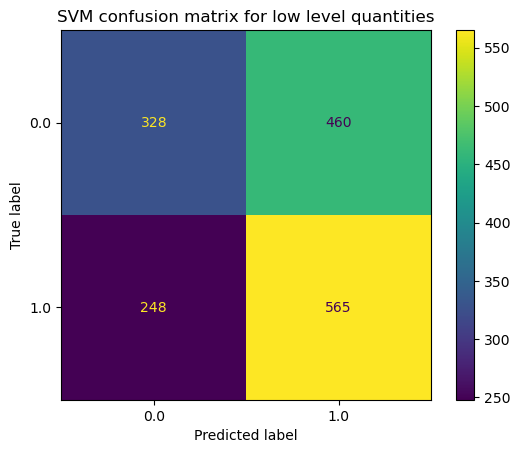

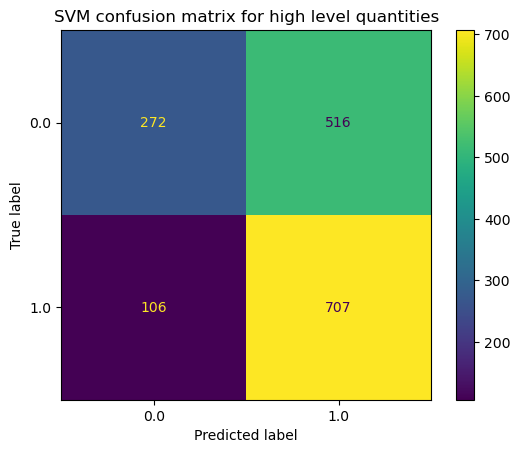

In [10]:
#for low level quantities
disp_low = ConfusionMatrixDisplay(confusion_matrix=cm_low_svm, display_labels=low_svm_classifier.classes_)
disp_low.plot()
plt.title("SVM confusion matrix for low level quantities")

#for low level quantities
disp_high = ConfusionMatrixDisplay(confusion_matrix=cm_high_svm, display_labels=high_svm_classifier.classes_)
disp_high.plot()
plt.title("SVM confusion matrix for high level quantities")

plt.show()

## Random Forest

### Classification Random Forest

In [14]:
#data doesn't require scaling, we'll use the original train and test data

#for low level quantities
low_rf_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
low_rf_classifier.fit(low_level_train, low_signal_train)

#for high level quantities
high_rf_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
high_rf_classifier.fit(high_level_train, high_signal_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

### Prediction of signal (1) or background (0)

In [15]:
#low level quantities prediction
low_signal_test_pred_rf = low_rf_classifier.predict(low_level_test)

#low level quantities confusion matrix and accuracy
cm_low_rf = confusion_matrix(low_signal_test, low_signal_test_pred_rf)
accuracy_low_rf = accuracy_score(low_signal_test, low_signal_test_pred_rf)

print(f"The confusion matrix for low level quantities, using the Random Forest classifier is:\n{cm_low_rf}")
print(f"The accuracy for low level quantities, using the Random Forest classifier is: {accuracy_low_rf}\n")

#high level quantities prediction
high_signal_test_pred_rf = high_rf_classifier.predict(high_level_test)

#high level quantities confusion matrix and accuracy
cm_high_rf = confusion_matrix(high_signal_test, high_signal_test_pred_rf)
accuracy_high_rf = accuracy_score(high_signal_test, high_signal_test_pred_rf)

print(f"The confusion matrix for high level quantities, using the Random Forest classifier is:\n{cm_high_rf}")
print(f"The accuracy for high level quantities, using the Random Forest classifier is: {accuracy_high_rf}")

The confusion matrix for low level quantities, using the Random Forest classifier is:
[[416 372]
 [325 488]]
The accuracy for low level quantities, using the Random Forest classifier is: 0.5646470955652717

The confusion matrix for high level quantities, using the Random Forest classifier is:
[[521 267]
 [259 554]]
The accuracy for high level quantities, using the Random Forest classifier is: 0.6714553404122423


### Plot confusion matrices for low and high level quantities

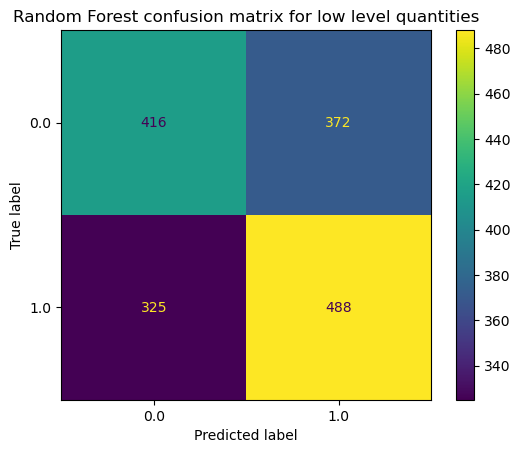

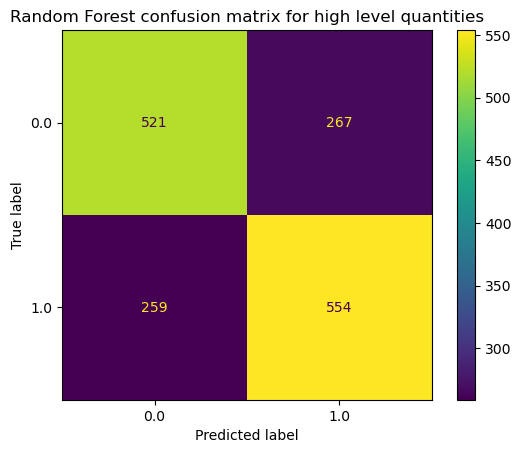

In [16]:
#for low level quantities
disp_low = ConfusionMatrixDisplay(confusion_matrix=cm_low_rf, display_labels=low_svm_classifier.classes_)
disp_low.plot()
plt.title("Random Forest confusion matrix for low level quantities")

#for low level quantities
disp_high = ConfusionMatrixDisplay(confusion_matrix=cm_high_rf, display_labels=high_svm_classifier.classes_)
disp_high.plot()
plt.title("Random Forest confusion matrix for high level quantities")

plt.show()

# Artificial Neural Network

## Tenserflow library

### Building the ANN

In [17]:
#data needs scaling, so we'll use the scaled train and test data

#building the ANN for the low level quantities data
low_ann = tf.keras.models.Sequential()
low_ann.add(Input(shape=(21,)))  # This is the Input layer
low_ann.add(tf.keras.layers.Dense(32, activation='relu'))
low_ann.add(tf.keras.layers.Dense(21, activation='relu')) #second hidden layer
low_ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #output layer

#building the ANN for the high level quantities data
high_ann = tf.keras.models.Sequential()
high_ann.add(Input(shape=(7,)))  # This is the Input layer
high_ann.add(tf.keras.layers.Dense(32, activation='relu'))
high_ann.add(tf.keras.layers.Dense(21, activation='relu')) #second hidden layer
high_ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #output layer

### Training the ANN 

In [18]:
#compile for low level data
low_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
low_ann.summary()

#compile for high level data
high_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
high_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │           693 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,419 (5.54 KB)

 Trainable params: 1,419 (5.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 21)             │           693 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971 (3.79 KB)

 Trainable params: 971 (3.79 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#for the low level quantities
low_ann.fit(low_level_train_scaled, low_signal_train, batch_size = 16, epochs = 150)

#for the high level quantities
high_ann.fit(high_level_train_scaled, high_signal_train, batch_size = 16, epochs = 150)

Epoch 1/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5303 - loss: 0.6963
Epoch 2/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5899 - loss: 0.6652
Epoch 3/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6199 - loss: 0.6502
Epoch 4/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6256 - loss: 0.6397
Epoch 5/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6411 - loss: 0.6307
Epoch 6/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6255 - loss: 0.6382
Epoch 7/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6491 - loss: 0.6274
Epoch 8/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6433 - loss: 0.6267
Epoch 9/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6583 - loss: 0.6151
Epoch 10/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6735 - loss: 0.6001
Epoch 11/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6738 - loss: 0.6016
Epoch 12/150
400/400 ━━━━━━━━━━━━━━━━━━━━

### Prediction of signal (1) or background (0)

In [20]:
#for the low level quantities
low_signal_test_pred_ann = low_ann.predict(low_level_test_scaled)
low_signal_pred = (low_signal_test_pred_ann>0.5)

#for the high level quantities
high_signal_test_pred_ann = high_ann.predict(high_level_test_scaled)
high_signal_pred = (high_signal_test_pred_ann>0.5)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
#low level quantities confusion matrix and accuracy
low_cm_ann = confusion_matrix(low_signal_test, low_signal_pred)
low_loss_ann, low_accuracy_ann = low_ann.evaluate(low_level_test_scaled, low_signal_test)

print(f"The confusion matrix for low level quantities, using ANN is:\n{low_cm_ann}")
print(f"The accuracy for low level quantities, using ANN is: {low_accuracy_ann}")
print(f"The loss for low level quantities, using ANN is: {low_loss_ann}\n")

#high level quantities confusion matrix and accuracy
high_cm_ann = confusion_matrix(high_signal_test, high_signal_pred)
high_loss_ann, high_accuracy_ann = high_ann.evaluate(high_level_test_scaled, high_signal_test)

print(f"The confusion matrix for high level quantities, using ANN is:\n{high_cm_ann}")
print(f"The accuracy for high level quantities, using ANN is: {high_accuracy_ann}")
print(f"The loss for high level quantities, using ANN is: {high_loss_ann}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5454 - loss: 0.9811
The confusion matrix for low level quantities, using ANN is:
[[401 387]
 [325 488]]
The accuracy for low level quantities, using ANN is: 0.555277943611145
The loss for low level quantities, using ANN is: 0.9632653594017029

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7011 - loss: 0.6062
The confusion matrix for high level quantities, using ANN is:
[[475 313]
 [169 644]]
The accuracy for high level quantities, using ANN is: 0.6989381909370422
The loss for high level quantities, using ANN is: 0.5948683023452759


### Plot confusion matrices for low and high level quantities

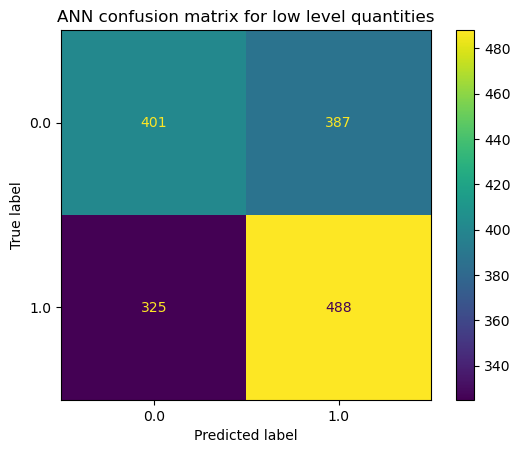

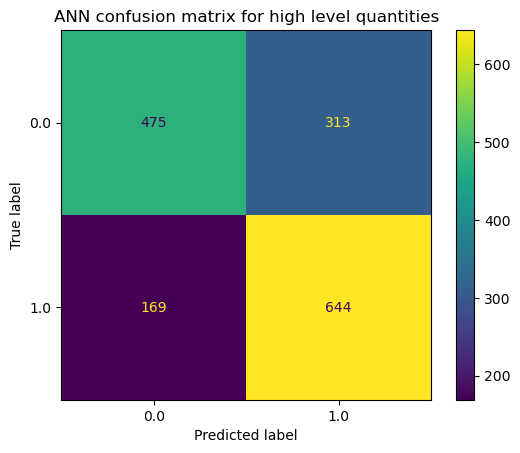

In [22]:
#for low level quantities
disp_low_ann = ConfusionMatrixDisplay(confusion_matrix=low_cm_ann, display_labels=low_svm_classifier.classes_)
disp_low_ann.plot()
plt.title("ANN confusion matrix for low level quantities")

#for low level quantities
disp_high_ann = ConfusionMatrixDisplay(confusion_matrix=high_cm_ann, display_labels=high_svm_classifier.classes_)
disp_high_ann.plot()
plt.title("ANN confusion matrix for high level quantities")

plt.show()

# Summary

### Low energy quantities
For supervised learning, the accuracy of low energy quantities using the SVM classifier is 0.5578. When using the Random Forest classifier, the accuracy is 0.5646. The Random Forest approach is slightly better. For the Artificial Neural Network, the accuracy of low energy quantities is 0.5553, which is very similar to the SVM approach but lower. The loss is 0.9633, which is very high.

The high energy quantities have better accuracy than the low energy ones in both supervised learning and the Artificial Neural Network. For the SVM classifier, the accuracy is 0.6115, and for the Random Forest it's 0.6714. Using the Artificial Neural Network, the accuracy is 0.6989, while the loss is 0.5949.

As we can see, low energy quantities pose a problem in all approaches. The accuracy is low, and specifically, the ANN approach is the lowest. This probably happens because the low energy data has more inputs than the high energy data, while they have the same number of layers. The high energy quantities have better accuracy for the ANN approach.